#Concept of Instantaneous Frequency

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal

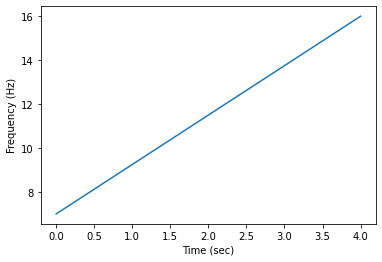

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.unwrap is deprecated and will be removed in SciPy 2.0.0, use numpy.unwrap instead


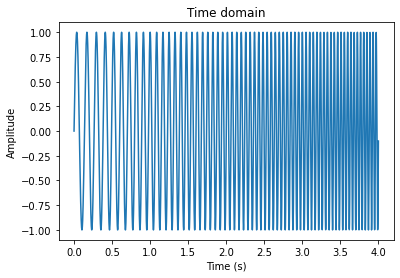

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


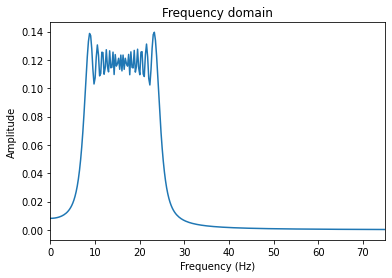

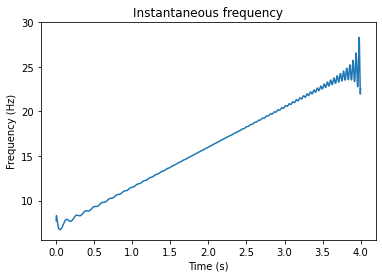

In [18]:
#Creating a linear Chirp 

# simulation details
srate = 1000
time  = np.arange(0,4,1/srate)
pnts  = len(time)

# frequencies for Fourier transform
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)-1))


# frequency range for linear chirp
f  = [7,25]

# generate chirp signal
ff = np.linspace(f[0],np.mean(f),pnts)
signal = np.sin(2*np.pi*ff*time)

plt.plot(time, ff)
#Vector of frequencies of Sine Wave 
plt.xlabel("Time (sec)")
plt.ylabel('Frequency (Hz)')
plt.show()

# compute instantaneous frequency
angles = np.angle(scipy.signal.hilbert(signal)) #Applying Hilbert Transform
instfreq = np.diff(scipy.unwrap(angles)) / (2*np.pi/srate)

# time-domain signal
plt.plot(time,signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

# frequency domain ("static" power spectrum)
amp = 2*np.abs(scipy.fft(signal)/pnts)
plt.plot(hz,amp[:len(hz)])
plt.title('Frequency domain')
plt.xlim(0,np.minimum(srate/2,f[1]*3))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# now show instantaneous frequency
plt.plot(time[:-1],instfreq)
plt.ylim(f[0]*.8,f[1]*1.2)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Instantaneous frequency')
plt.show()


From looking at the Power spectra, we aren't sure of how time domain signal looks like. 

Understanding the 'unwrap()'  function

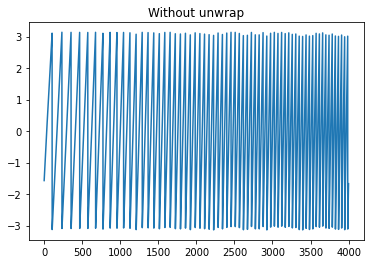

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.unwrap is deprecated and will be removed in SciPy 2.0.0, use numpy.unwrap instead
  """


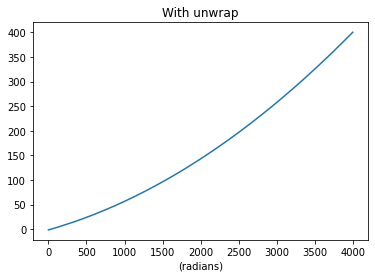

say: 400 on y-axis of the graph = 400pi radians


In [19]:
plt.plot (angles)
plt.title('Without unwrap')
plt.show()

plt.plot (scipy.unwrap(angles))
plt.title('With unwrap')
plt.xlabel('(radians)')
plt.show()
print('say: 400 on y-axis of the graph = 400pi radians')


The unwrap function basically shifts the bottom point to the top point of the same x value. (Understand: the first graph shows that after each cycle there is a steep drop from high to low. What unwrap does is that it joins both these points to cut on sharp edges to avoid non-stationarities.)

Q. What happens if we don't use unwrap() in the power spectra?

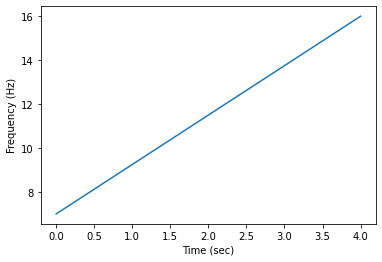

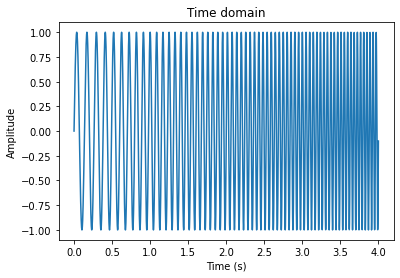

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


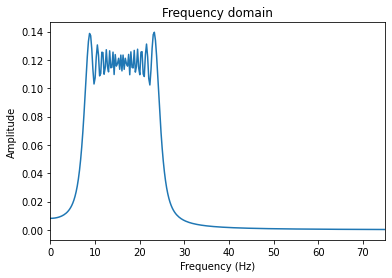

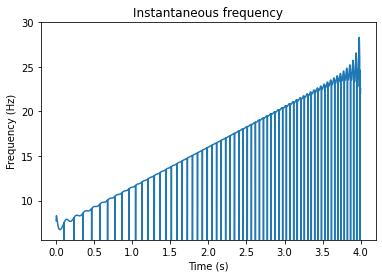

In [20]:
# simulation details
srate = 1000
time  = np.arange(0,4,1/srate)
pnts  = len(time)

# frequencies for Fourier transform
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)-1))


# frequency range for linear chirp
f  = [7,25]

# generate chirp signal
ff = np.linspace(f[0],np.mean(f),pnts)
signal = np.sin(2*np.pi*ff*time)

plt.plot(time, ff)
#Vector of frequencies of Sine Wave 
plt.xlabel("Time (sec)")
plt.ylabel('Frequency (Hz)')
plt.show()

# compute instantaneous frequency
angles = np.angle(scipy.signal.hilbert(signal)) #Applying Hilbert Transform
instfreq = np.diff(angles) / (2*np.pi/srate)

# time-domain signal
plt.plot(time,signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

# frequency domain ("static" power spectrum)
amp = 2*np.abs(scipy.fft(signal)/pnts)
plt.plot(hz,amp[:len(hz)])
plt.title('Frequency domain')
plt.xlim(0,np.minimum(srate/2,f[1]*3))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# now show instantaneous frequency
plt.plot(time[:-1],instfreq)
plt.ylim(f[0]*.8,f[1]*1.2)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Instantaneous frequency')
plt.show()


There is a steep drop & rise again. 